## Assignment 15: CLUSTERING ANALYSIS 

Understanding and Implementing K-Means and DBSCAN Algorithms

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing:

1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [2]:
df = pd.read_excel('EastWestAirlines.xlsx')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


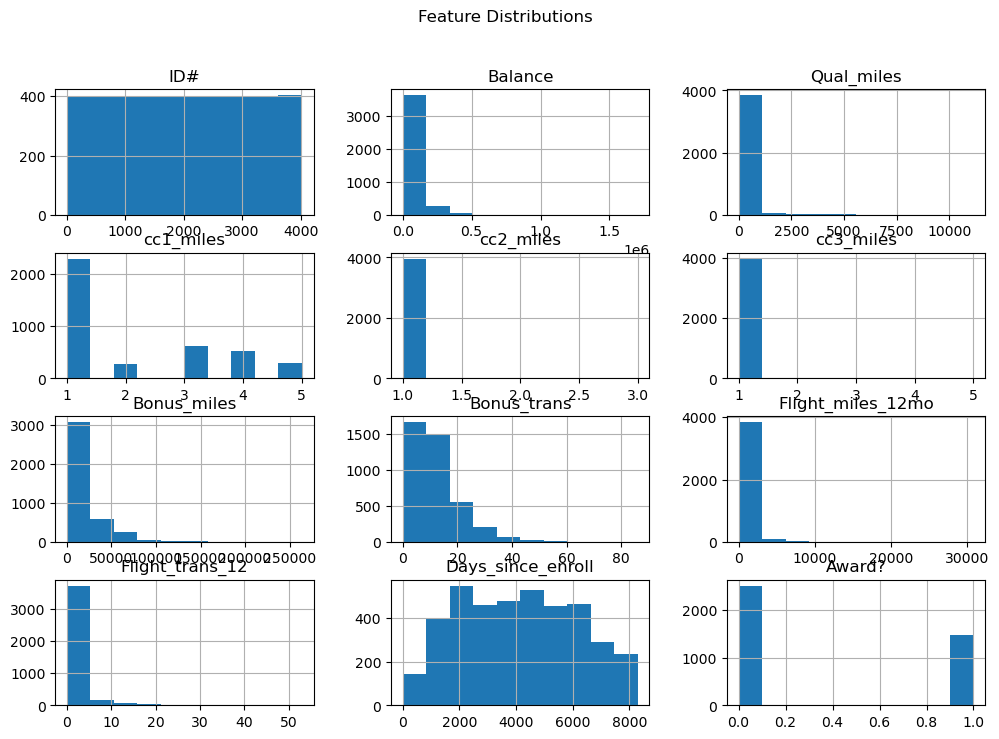

In [7]:
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

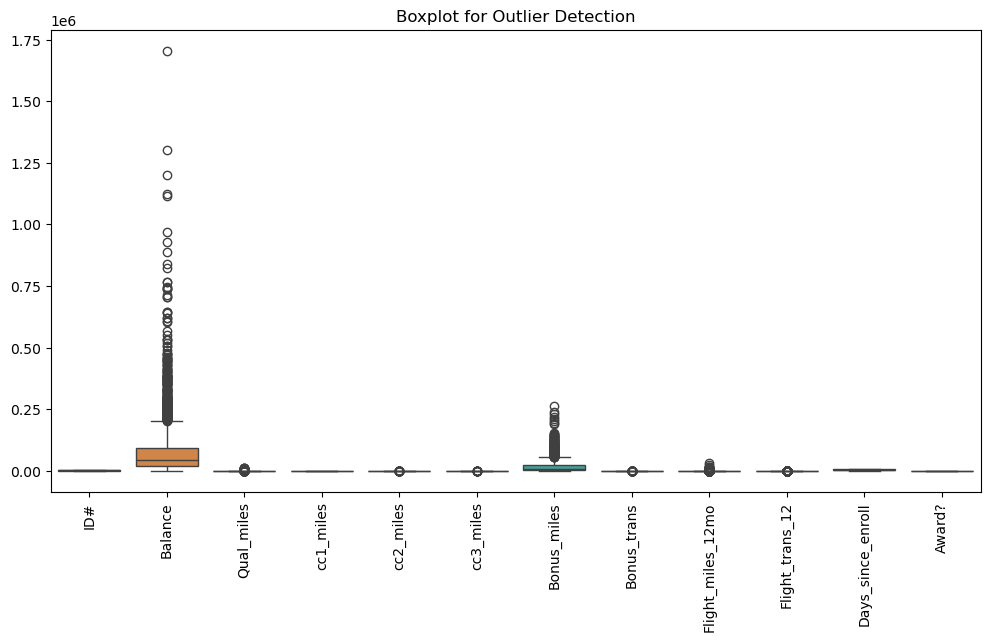

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

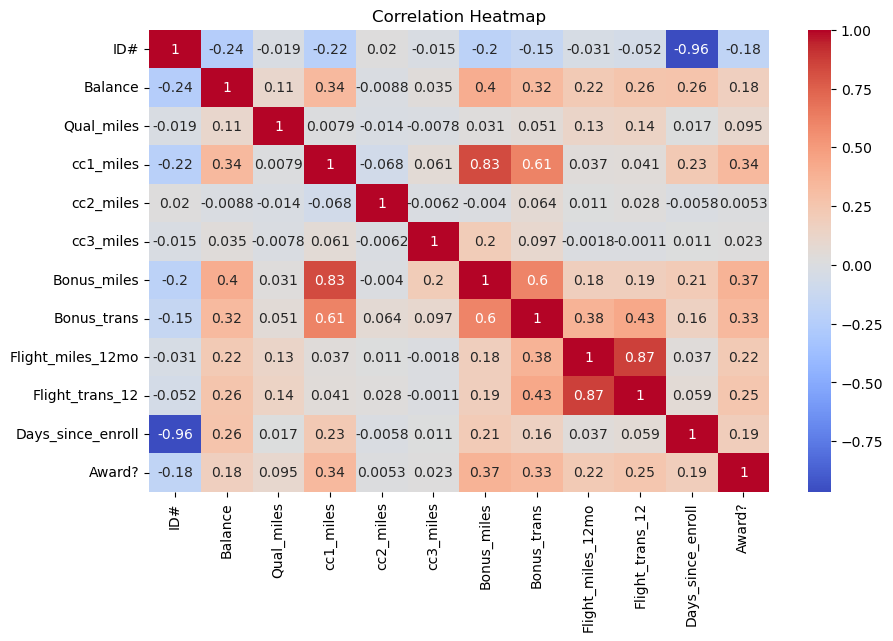

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

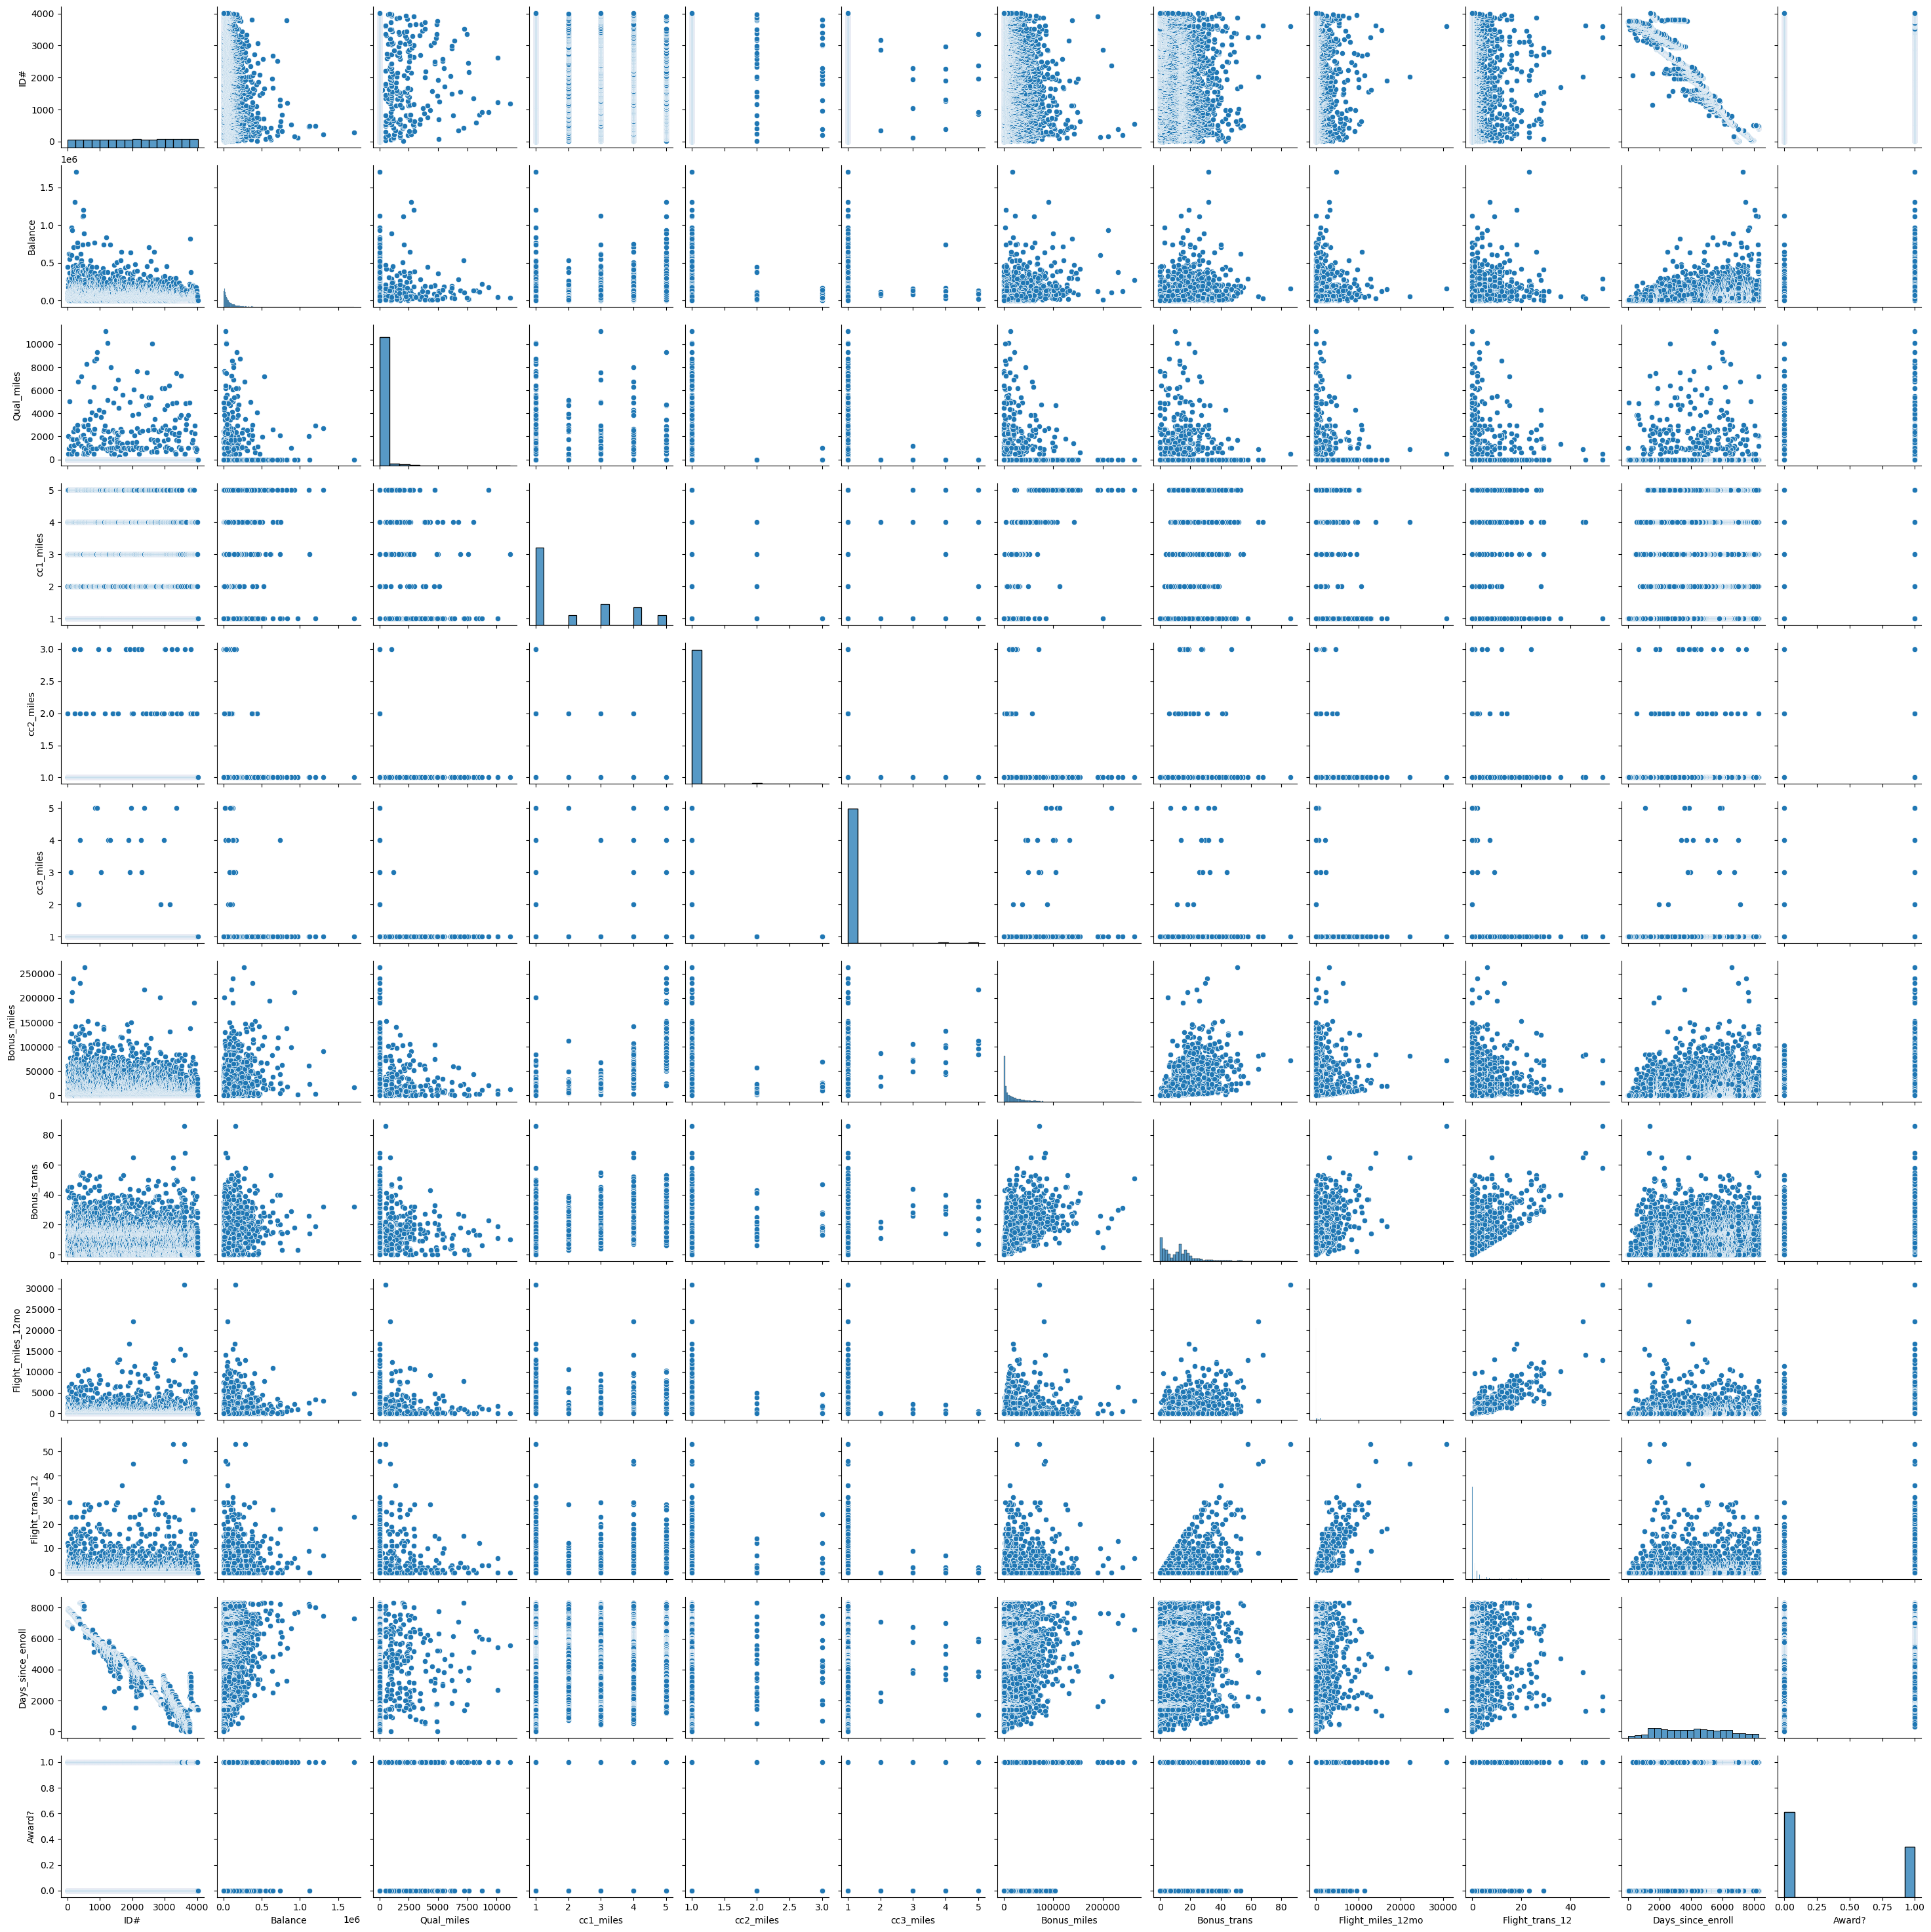

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

Implementing Clustering Algorithms:

•	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.

•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

•	Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.



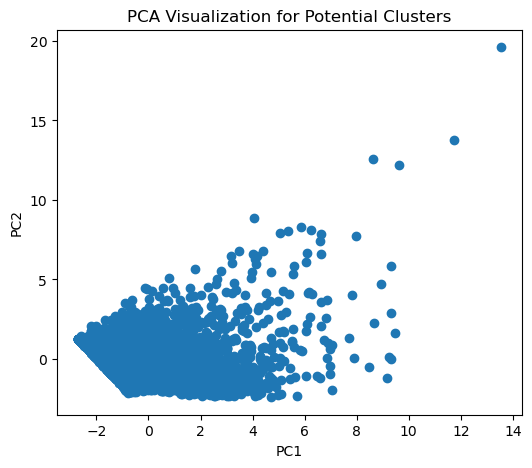

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization for Potential Clusters")
plt.show()

In [16]:
 # change K as per elbow
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans_labels = kmeans.fit_predict(X_scaled)

In [18]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

K-Means Silhouette Score: 0.201891717665419


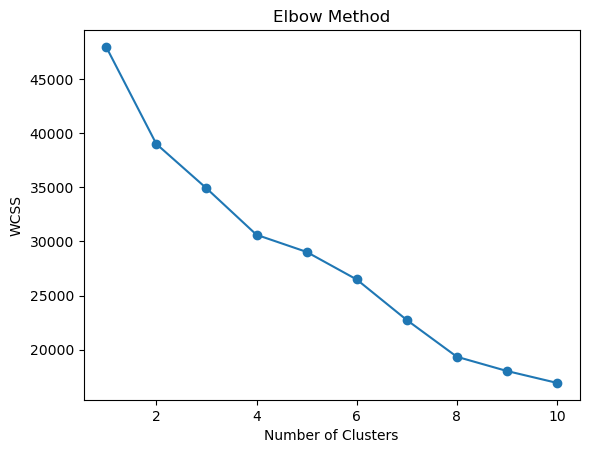

In [14]:
# Elbow Method (Finding Optimal K)
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [19]:
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

K-Means Silhouette Score: 0.201891717665419


In [21]:
# DBSCAN Clusters
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

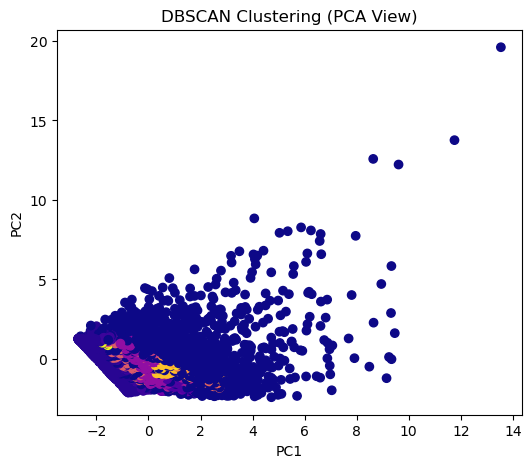

In [22]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='plasma')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clustering (PCA View)")
plt.show()

In [28]:
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN could not form meaningful clusters")

DBSCAN Silhouette Score: -0.2823258834687895


In [29]:
for eps in [0.3, 0.5, 0.7]:
    for min_pts in [3, 5, 10]:
        db = DBSCAN(eps=eps, min_samples=min_pts)
        labels = db.fit_predict(X_scaled)

        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            print(f"eps={eps}, minPts={min_pts}, Silhouette={score:.3f}")

eps=0.3, minPts=3, Silhouette=-0.503
eps=0.3, minPts=5, Silhouette=-0.442
eps=0.3, minPts=10, Silhouette=-0.257
eps=0.5, minPts=3, Silhouette=-0.348
eps=0.5, minPts=5, Silhouette=-0.282
eps=0.5, minPts=10, Silhouette=-0.295
eps=0.7, minPts=3, Silhouette=-0.146
eps=0.7, minPts=5, Silhouette=-0.068
eps=0.7, minPts=10, Silhouette=-0.060


 K-Means is suitable when clusters are compact and the number of clusters is known.

DBSCAN is preferred when the dataset contains noise and irregular cluster shapes.

PCA visualization and silhouette scores help evaluate clustering quality.

Cluster Analysis and Interpretation:

•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.


K-Means:

The algorithm formed well-separated and compact clusters based on feature similarity. Each cluster represents a distinct group with low, medium, and high feature values.

DBSCAN:

DBSCAN identified dense regions as clusters and successfully detected noise points as outliers. It captured irregular cluster shapes without predefining the number of clusters.

Visualization:

Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

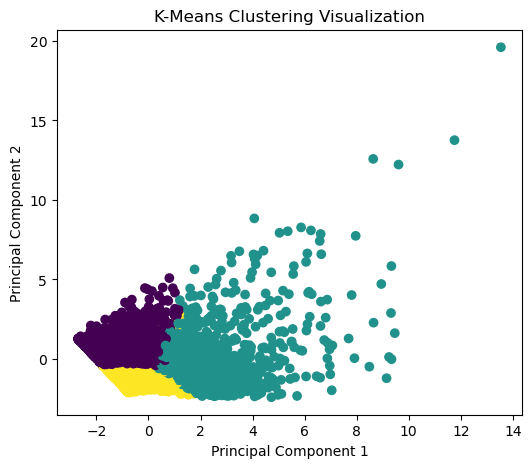

In [30]:
plt.figure(figsize=(6,5))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=kmeans_labels,
    cmap='viridis'
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization")
plt.show()


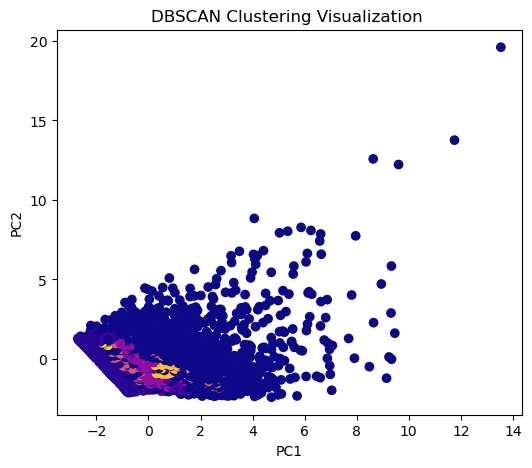

In [32]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='plasma')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clustering Visualization ")
plt.show()

Evaluation and Performance Metrics:

Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

In [35]:
# A higher silhouette score indicates well-separated and compact clusters formed by K-Means.
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette)

K-Means Silhouette Score: 0.201891717665419


In [37]:
# The silhouette score evaluates the density-based clusters formed by DBSCAN while ignoring noise points.
mask = dbscan_labels != -1

if len(set(dbscan_labels[mask])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("DBSCAN could not form sufficient clusters for evaluation")

DBSCAN Silhouette Score: -0.10765271486979784
